# Question 1 :  PCA (Principle component analysis)

### Principal component analysis (PCA)
It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. 

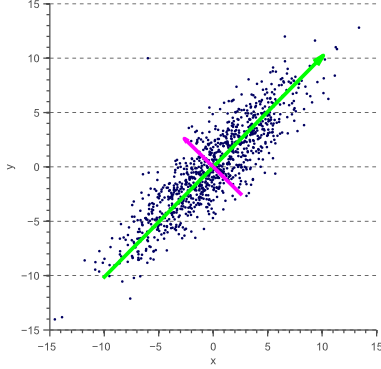

First we will be importing the required libraries for doing PCA

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import cv2
import os

### First we read and understand the data

In [5]:
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    return image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
path='./A3/A3/dataset/'
images=os.listdir(path)
len(images)

520

### Let us read one image first

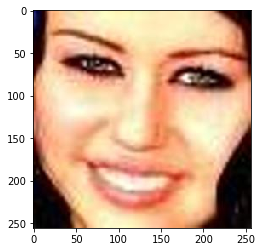

In [13]:
image1 = cv2.imread(path+images[0], cv2.IMREAD_COLOR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

### Reading the dataset

In [9]:
dataset = []
for image_name in images:
    dataset.append(read_image(path + image_name))
dataset=np.array(dataset)


dataset_grayscaled=[]
for i in range(dataset.shape[0]):
    gray = rgb2gray(dataset[i])
    dataset_grayscaled.append(gray)
dataset_grayscaled=np.array(dataset_grayscaled)
dataset_grayscaled.shape

(520, 48, 48)

In [10]:
final_dataset=[]
for i in range(dataset_grayscaled.shape[0]):
    final_dataset.append(dataset_grayscaled[i].flatten())
    
final_dataset=np.array(final_dataset)
final_dataset

array([[ 33.3195,   7.7339,  18.4993, ...,   5.0812,   4.0813,  13.4933],
       [ 40.1594,  28.612 ,  16.1788, ...,  23.8792,  32.4761,  29.1174],
       [ 62.4066,   6.4446,  10.8895, ...,  21.6927,  23.6925,  16.6932],
       ...,
       [146.9072, 148.907 , 153.9065, ...,  73.2764,  81.0198,  77.0633],
       [ 44.1761,  58.3982,  63.8384, ...,  73.797 ,  30.6442,  53.9686],
       [ 61.0019,  56.7204,  71.8931, ...,  32.0695,  26.4291,  25.0872]])

### Dimension of the dataset

In [11]:
final_dataset.shape

(520, 2304)

### Reading the labels for the dataset

In [8]:
labels=[]
for image_name in images:
    temp=image_name.split('.')[0]
    temp=temp.split('_')
    labels.append(int(temp[0]))
labels=np.array(labels)
labels

array([4, 4, 3, 6, 6, 0, 5, 7, 2, 6, 7, 2, 3, 1, 4, 6, 1, 5, 1, 7, 1, 3,
       6, 0, 1, 3, 0, 7, 6, 2, 1, 6, 3, 6, 7, 4, 6, 4, 3, 2, 5, 3, 1, 7,
       7, 3, 0, 4, 4, 5, 2, 2, 3, 3, 5, 0, 1, 4, 2, 0, 3, 0, 3, 6, 7, 1,
       0, 7, 0, 5, 4, 5, 6, 7, 2, 3, 6, 2, 2, 1, 1, 6, 1, 3, 1, 4, 2, 0,
       3, 3, 5, 2, 5, 0, 2, 4, 0, 4, 0, 6, 0, 1, 5, 5, 7, 1, 5, 4, 1, 0,
       4, 6, 3, 7, 6, 5, 2, 1, 2, 5, 5, 4, 2, 1, 3, 3, 3, 1, 4, 4, 4, 5,
       5, 5, 7, 3, 6, 0, 3, 6, 4, 1, 0, 1, 6, 6, 7, 7, 7, 0, 0, 5, 3, 4,
       2, 6, 3, 0, 3, 1, 2, 0, 7, 4, 3, 2, 4, 4, 2, 5, 6, 0, 0, 5, 6, 3,
       7, 3, 0, 0, 7, 6, 0, 0, 2, 1, 0, 3, 6, 6, 5, 6, 6, 1, 2, 0, 7, 7,
       3, 2, 7, 5, 5, 5, 1, 4, 2, 1, 6, 2, 0, 7, 6, 7, 7, 0, 4, 1, 7, 2,
       5, 7, 5, 5, 5, 1, 6, 7, 3, 0, 0, 1, 6, 7, 7, 4, 7, 5, 3, 4, 6, 4,
       5, 0, 6, 0, 6, 7, 0, 1, 3, 4, 2, 3, 2, 7, 2, 1, 2, 2, 0, 0, 4, 1,
       5, 6, 4, 5, 7, 4, 1, 2, 2, 3, 7, 0, 5, 3, 2, 5, 2, 4, 5, 3, 6, 6,
       7, 6, 7, 2, 4, 6, 5, 7, 6, 0, 2, 3, 4, 7, 6,

### Image after dimension reduction and gray scaling

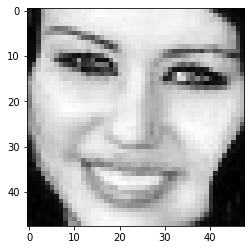

In [12]:
plt.imshow(final_dataset[0].reshape(48,48),cmap='gray')

In [14]:
means=np.mean(final_dataset,axis=0)
means

array([80.50991846, 84.66183269, 87.15902154, ..., 95.914025  ,
       95.52426327, 95.26528365])

### Preprocessing for pca (centralizing the dataset by subtracting mean)

In [15]:
centered_dataset=final_dataset-means

In [16]:
centered_dataset.shape

(520, 2304)

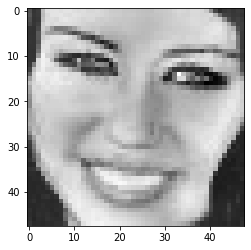

In [17]:
plt.imshow(centered_dataset[0].reshape(48,48),cmap='gray')

### Covariance Matrix

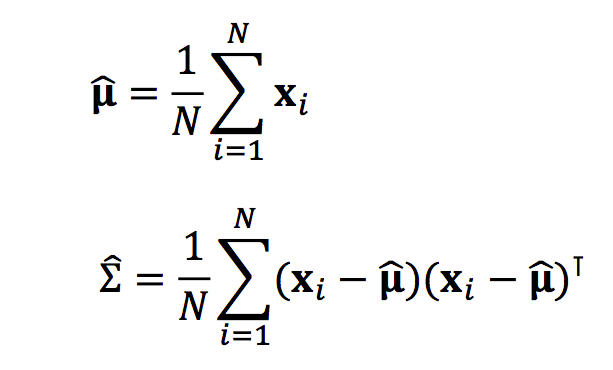

In [35]:
covariance_matrix = (centered_dataset).T.dot((centered_dataset))/(centered_dataset.shape[0]-1)

### SVD (Singular Vector Decomposition)

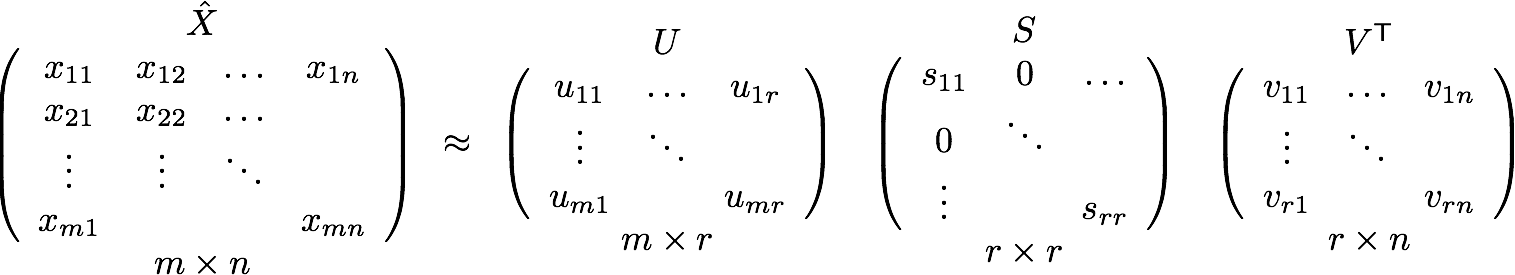

In [36]:
u,s,v = np.linalg.svd(covariance_matrix)

In [37]:
u.shape

(2304, 2304)

In [38]:
v.shape

(2304, 2304)

### Matrix after applying PCA 

In [39]:
pca_matrix = np.matmul(centered_dataset,u[:,:200])

In [40]:
pca_matrix.shape

(520, 200)

### Reconstruction of image

$    ReconstructedImage = PcaMatrix *  U^{T} $

In [41]:
reconstructed_matrix=np.matmul(pca_matrix,u[:,:200].T)

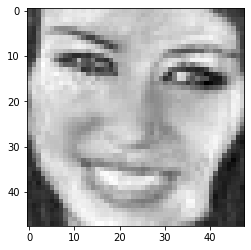

In [42]:
plt.imshow(reconstructed_matrix[0].reshape(48,48),cmap='gray')

We can also 
### Eigen Decomposition (Eigen values and Eigen vectors)   (    Ax= $\lambda$ x)

In [43]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

In [1]:
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
for i in eigen_pairs:
    print(i[0])

In [45]:
total_ev = sum(eigen_values)
var_exp = [(i / total_ev)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('variance : ',var_exp[:10])
print('cumulative variance : ',cum_var_exp[:10])

variance :  [20.866238084616914, 16.195562774405868, 9.536855961882848, 6.651068537859367, 3.559714122228662, 2.5391677396431684, 2.526050764320052, 1.9361141018351087, 1.666252441104898, 1.3845898334460236]
cumulative variance :  [20.86623808 37.06180086 46.59865682 53.24972536 56.80943948 59.34860722
 61.87465798 63.81077209 65.47702453 66.86161436]


### Finding the mean_squared_error

In [48]:
from sklearn.metrics import mean_squared_error

mse_array=[]
itr=[]
for n in range(50,600,50):
    itr.append(n)
    Y = np.matmul(centered_dataset,u[:,:n])
    reconstructed_matrix=np.matmul(Y,u[:,:n].T)
#     plt.imshow(pp[0].reshape(64,64),cmap='gray')
#     plt.show()
    mse = (np.square(centered_dataset - reconstructed_matrix)).mean(axis=1)
    #mse_array.append(np.sum(mean_squared_error(final_dataset-pp))
    mse_array.append(np.sum(mse))

## Plot between MSE and no. of components

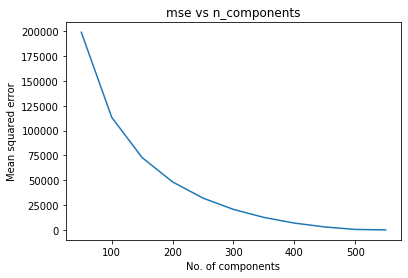

In [49]:
x = itr
y = mse_array 

plt.plot(x, y) 
  
plt.xlabel('No. of components') 
plt.ylabel('Mean squared error')  
plt.title('mse vs n_components') 
plt.show() 

##  At n=200, It covers most variation in the dataset.

### Data Visualization

### 1-D Scatter Plot

<Figure size 432x288 with 0 Axes>

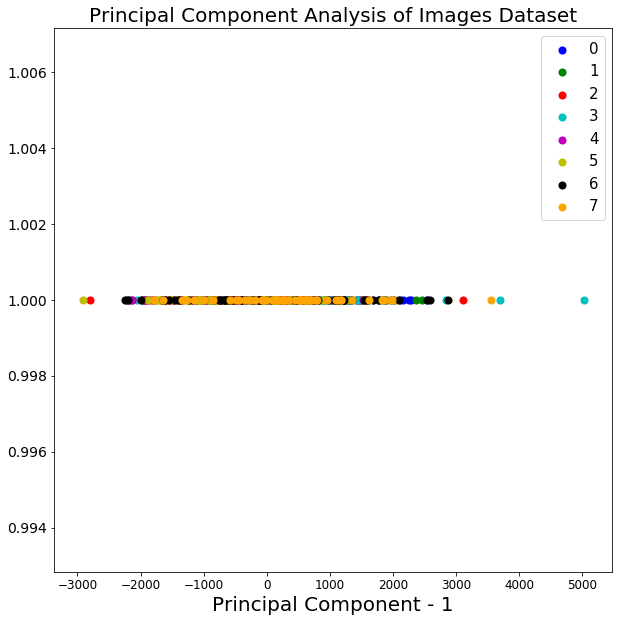

In [61]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('',fontsize=20)
plt.title("Principal Component Analysis of Images Dataset",fontsize=20)
targets = [i for i in range(8)]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
#     print(len(indicesToKeep))
#     print(len(pca_matrix[indicesToKeep, 0]))
    plt.scatter(pca_matrix[indicesToKeep, 0], len(pca_matrix[indicesToKeep, 0])*[1], c = color, s = 50)
plt.legend(targets,prop={'size': 15})

### 2-D Scatter Plot

<Figure size 432x288 with 0 Axes>

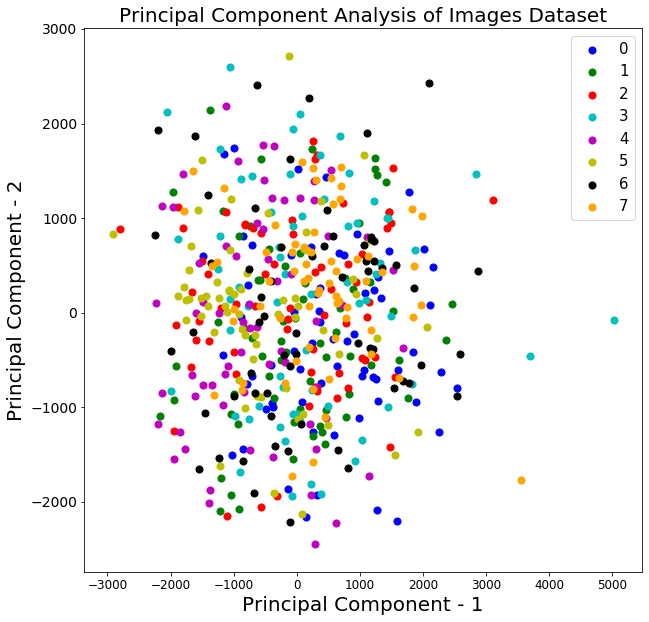

In [50]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Images Dataset",fontsize=20)
targets = [i for i in range(8)]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    plt.scatter(pca_matrix[indicesToKeep, 0]
               , pca_matrix[indicesToKeep, 1], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### 3-D Scatter Plot

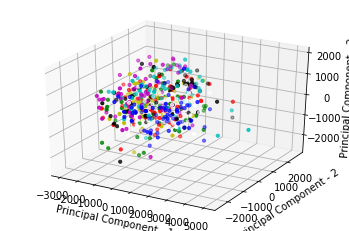

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component - 1')
ax.set_ylabel('Principal Component - 2')
ax.set_zlabel('Principal Component - 3')
targets = [i for i in range(8)]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(pca_matrix[indicesToKeep, 0],pca_matrix[indicesToKeep, 1],pca_matrix[indicesToKeep, 2], c = color, s = 10)